In [ ]:
pip install ucimlrepo

In [ ]:
from ucimlrepo import fetch_ucirepo
import numpy as np
import pandas as pd
import random
import copy

In [ ]:
# fetch dataset
support2 = fetch_ucirepo(id=880)

# data (as pandas dataframes)
X = support2.data.features
y = support2.data.targets

# metadata
print(support2.metadata)

# variable information
print(support2.variables)


{'uci_id': 880, 'name': 'SUPPORT2', 'repository_url': 'https://archive.ics.uci.edu/dataset/880/support2', 'data_url': 'https://archive.ics.uci.edu/static/public/880/data.csv', 'abstract': "This dataset comprises 9105 individual critically ill patients across 5 United States medical centers, accessioned throughout 1989-1991 and 1992-1994.\nEach row concerns hospitalized patient records who met the inclusion and exclusion criteria for nine disease categories: acute respiratory failure, chronic obstructive pulmonary disease, congestive heart failure, liver disease, coma, colon cancer, lung cancer, multiple organ system failure with malignancy, and multiple organ system failure with sepsis. The goal is to determine these patients' 2- and 6-month survival rates based on several physiologic, demographics, and disease severity information. \nIt is an important problem because it addresses the growing national concern over patients' loss of control near the end of life. It enables earlier deci

In [ ]:
new_df = copy.deepcopy(X)
target = copy.deepcopy(y)
print(target.columns)
new_df.columns

Index(['death', 'hospdead', 'sfdm2'], dtype='object')


Index(['age', 'sex', 'dzgroup', 'dzclass', 'num.co', 'edu', 'income', 'scoma',
       'charges', 'totcst', 'totmcst', 'avtisst', 'race', 'sps', 'aps',
       'surv2m', 'surv6m', 'hday', 'diabetes', 'dementia', 'ca', 'prg2m',
       'prg6m', 'dnr', 'dnrday', 'meanbp', 'wblc', 'hrt', 'resp', 'temp',
       'pafi', 'alb', 'bili', 'crea', 'sod', 'ph', 'glucose', 'bun', 'urine',
       'adlp', 'adls', 'adlsc'],
      dtype='object')

Here we drop those variables which can not have any influence on target.

Variables to Drop:

id - This is an identifier and does not contribute to the prediction.

death - This is a target variable that we are not using.

hospdead - This is a target variable that we are not using.

slos - Other continuous variable which might not be directly related to sfdm2
prediction.

d.time - Other continuous variable which might not be directly related to sfdm2
prediction.

prg2m - Physician’s 2-month survival estimate, not directly needed for sfdm2 prediction.

prg6m - Physician’s 6-month survival estimate, not directly needed for sfdm2 prediction.

dnrday - Specific day of DNR order, less relevant for predicting sfdm2.

adlsc - Imputed ADL Calibrated to Surrogate, might be redundant with other ADL measures.

In [ ]:
print(new_df.shape)
new_df.drop(columns=['charges', 'totcst', 'totmcst', 'avtisst', 'hday', 'dnr', 'dnrday', 'adlsc'], inplace=True)
print(new_df.shape)

(9105, 42)
(9105, 34)


In [ ]:
new_df['prg6m'].unique()

array([2.50e-01, 0.00e+00, 5.00e-01, 9.00e-01, 7.00e-01, 4.00e-01,
       1.25e-04,      nan, 1.00e-03, 1.25e-01, 1.00e+00, 1.00e-01,
       6.00e-01, 7.50e-01, 9.50e-01, 8.50e-01, 8.00e-01, 2.00e-01,
       5.00e-02, 8.00e-03, 8.57e-01, 6.14e-01, 3.00e-01, 1.50e-01,
       1.56e-02, 6.50e-01, 1.00e-06, 2.00e-02, 3.37e-03, 2.16e-01,
       9.80e-01, 3.50e-01, 9.90e-01, 2.16e-04, 9.20e-01, 3.43e-04,
       5.12e-01, 7.40e-01, 1.00e-02, 7.29e-04, 9.00e-02, 3.30e-01,
       6.80e-01, 3.43e-01, 6.00e-02, 4.00e-02, 9.30e-01, 5.50e-01,
       4.50e-01, 8.30e-01, 9.40e-01, 1.20e-01, 9.70e-01, 1.90e-01,
       9.10e-01, 8.00e-06, 2.80e-01, 6.40e-05, 8.00e-02, 9.41e-01,
       6.40e-02, 9.60e-01, 7.70e-01, 7.00e-02, 6.60e-01, 2.70e-01,
       7.29e-01, 8.80e-01, 7.80e-01, 8.70e-01, 1.80e-01, 8.20e-01,
       4.22e-01, 8.40e-01, 2.70e-02, 4.70e-01, 2.70e-05, 8.90e-01,
       3.00e-02, 5.80e-01, 2.30e-01, 5.10e-01, 6.10e-01, 3.90e-01,
       5.12e-04, 4.90e-01, 2.40e-01, 4.80e-01])

In [ ]:
print(new_df.shape)
new_df.drop(columns=['prg2m', 'prg6m'], inplace=True)
print(new_df.shape)

(9105, 34)
(9105, 32)


draw the histogram for variables to understand their distribution, how they behave, and what kind they are (categorical, numerical, ...).

array([[<Axes: title={'center': 'age'}>,
        <Axes: title={'center': 'num.co'}>,
        <Axes: title={'center': 'edu'}>,
        <Axes: title={'center': 'scoma'}>,
        <Axes: title={'center': 'sps'}>],
       [<Axes: title={'center': 'aps'}>,
        <Axes: title={'center': 'surv2m'}>,
        <Axes: title={'center': 'surv6m'}>,
        <Axes: title={'center': 'diabetes'}>,
        <Axes: title={'center': 'dementia'}>],
       [<Axes: title={'center': 'meanbp'}>,
        <Axes: title={'center': 'wblc'}>,
        <Axes: title={'center': 'hrt'}>,
        <Axes: title={'center': 'resp'}>,
        <Axes: title={'center': 'temp'}>],
       [<Axes: title={'center': 'pafi'}>,
        <Axes: title={'center': 'alb'}>,
        <Axes: title={'center': 'bili'}>,
        <Axes: title={'center': 'crea'}>,
        <Axes: title={'center': 'sod'}>],
       [<Axes: title={'center': 'ph'}>,
        <Axes: title={'center': 'glucose'}>,
        <Axes: title={'center': 'bun'}>,
        <Axes: title

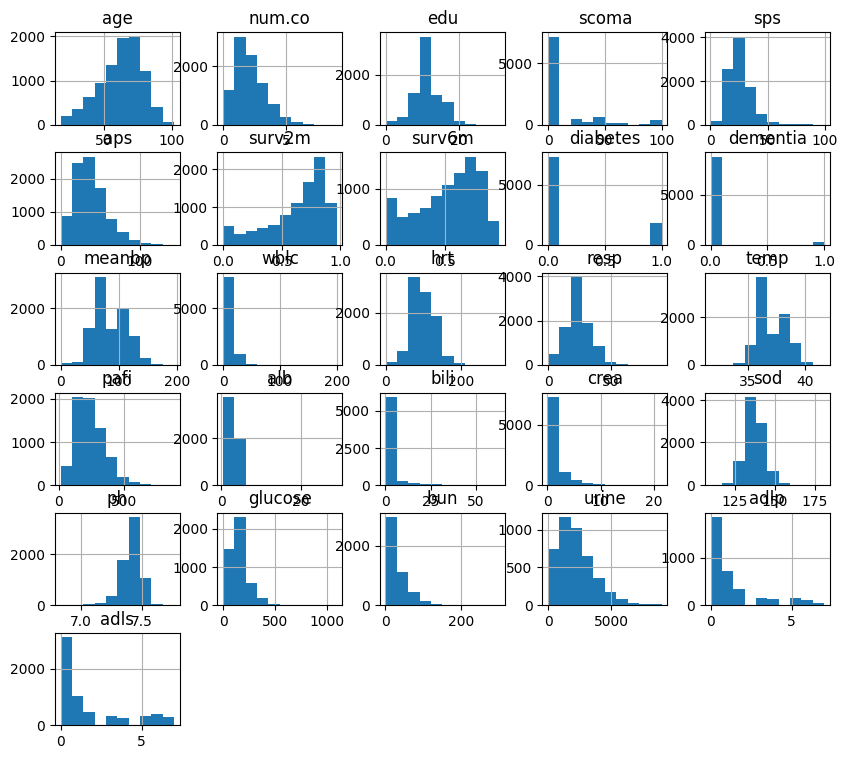

In [ ]:
new_df.hist(figsize=(10,9))

orginal dataset has 3 sets of target to predict but thats not what we gonna do, we just use "sfdm2"; since it is more important because shows based on the data we have how is the functional disability of the patient to determine the Sickness Profile Impact.

In [ ]:
new_tar = target.drop(['death', 'hospdead'], axis=1)
print(target.shape, new_tar.shape)
new_tar.columns

(9105, 3) (9105, 1)


Index(['sfdm2'], dtype='object')

removing nan values is one of the most important steps in data preprocessing, so we need to know where are the nan variables are and how many they are.

In [ ]:
nan_mask = new_df.isna()
columns_with_nan = nan_mask.any()
columns_with_nan = new_df.columns[nan_mask.any()].tolist()

nan_counts = new_df.isna().sum()
columns_with_nan = nan_counts[nan_counts > 0]

print(columns_with_nan)

edu        1634
income     2982
scoma         1
race         42
sps           1
aps           1
surv2m        1
surv6m        1
meanbp        1
wblc        212
hrt           1
resp          1
temp          1
pafi       2325
alb        3372
bili       2601
crea         67
sod           1
ph         2284
glucose    4500
bun        4352
urine      4862
adlp       5641
adls       2867
dtype: int64


From the observations above, it is evident that there are many NaN values in this dataset. If we were to drop all rows with any NaN values, we would be left with only 450 data points out of the original 9000. Therefore, a more strategic approach is required. By examining the number of NaN values in each column, we can identify features with a high proportion of missing data. Instead of dropping entire rows, which would result in losing over 90% of our data, we can remove these specific columns. As shown, many columns have over 1000 missing values. Consequently, it is more effective to drop these columns rather than sacrificing a significant portion of the dataset.

In [ ]:
df_colnan = copy.deepcopy(new_df)
nan_counts = new_df.isna().sum()
columns_with_nan = nan_counts[nan_counts > 1000]
for i in new_df.columns:
  if i in columns_with_nan:
    df_colnan = df_colnan.drop(i, axis= 1)

print(df_colnan.shape)
conc_df = pd.concat([df_colnan, new_tar],axis=1)
print(conc_df.shape)
print(conc_df.columns)
print(df_colnan.columns)

(9105, 21)
(9105, 22)
Index(['age', 'sex', 'dzgroup', 'dzclass', 'num.co', 'scoma', 'race', 'sps',
       'aps', 'surv2m', 'surv6m', 'diabetes', 'dementia', 'ca', 'meanbp',
       'wblc', 'hrt', 'resp', 'temp', 'crea', 'sod', 'sfdm2'],
      dtype='object')
Index(['age', 'sex', 'dzgroup', 'dzclass', 'num.co', 'scoma', 'race', 'sps',
       'aps', 'surv2m', 'surv6m', 'diabetes', 'dementia', 'ca', 'meanbp',
       'wblc', 'hrt', 'resp', 'temp', 'crea', 'sod'],
      dtype='object')


In the final stage, we drop columns with more than 1000 missing values. However, some data points still contain NaN values. To address this, we first concatenate the target and feature columns. Then, we remove all data points that contain any remaining NaN values. as we see we lost around 1000 number of datapoints which is affordable for us and much more effiecent than simple dropping.

In [ ]:
conc_df = conc_df.dropna()
new_tar = conc_df['sfdm2']
df_colnan = conc_df.drop('sfdm2', axis=1)
print(df_colnan.shape)
print(new_tar.shape)

(7492, 21)
(7492,)


In the next stage, we need to discretize our continuous (numerical) features. We use the quantile-based discretization method because the histograms show a Gaussian-like distribution, and we know this method works well in such cases. With the help of the Sturges' formula, which provides an initial estimate for the number of bins needed, we observed that using this number directly often results in an unnecessarily high number of bins (for example, 13 bins for age). This leads to overly detailed distributions, which are unrealistic and problematic for modeling. Additionally, some features exhibit dense-sparse patterns. Therefore, we randomly reduce the number of bins and draw histograms, selecting the one that appears most suitable.

7492
7492
7492
7492
7492
7492
7492
7492
7492
7492
7492
7492
7492
7492


array([[<Axes: title={'center': 'age'}>,
        <Axes: title={'center': 'num.co'}>,
        <Axes: title={'center': 'scoma'}>,
        <Axes: title={'center': 'sps'}>],
       [<Axes: title={'center': 'aps'}>,
        <Axes: title={'center': 'surv2m'}>,
        <Axes: title={'center': 'surv6m'}>,
        <Axes: title={'center': 'diabetes'}>],
       [<Axes: title={'center': 'dementia'}>,
        <Axes: title={'center': 'meanbp'}>,
        <Axes: title={'center': 'wblc'}>,
        <Axes: title={'center': 'hrt'}>],
       [<Axes: title={'center': 'resp'}>,
        <Axes: title={'center': 'temp'}>,
        <Axes: title={'center': 'crea'}>,
        <Axes: title={'center': 'sod'}>]], dtype=object)

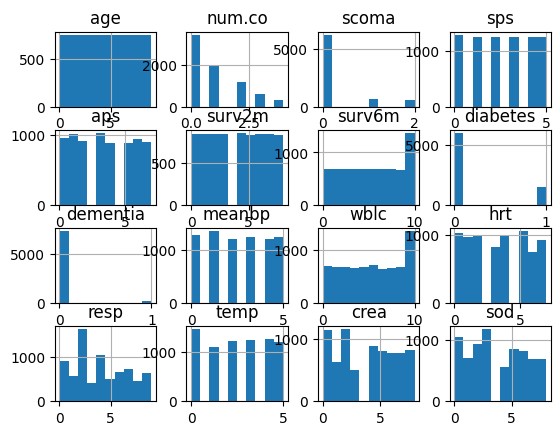

In [ ]:
new_df = copy.deepcopy(df_colnan)
categs = ['diabetes', 'dementia', 'dzgroup', 'dzclass', 'sex', 'race', 'ca']

for testcl in new_df.columns:
  if testcl in categs:
    continue
  column_to_disc = new_df[testcl]
  n = len(column_to_disc)
  print(n)
  i = random.randint(2, 7)
  number_of_bins = int(1 + np.log2(n)) - i

  new_df[testcl] = pd.qcut(column_to_disc, q=number_of_bins, labels=False, duplicates='drop')
new_df.hist()

array([[<Axes: title={'center': 'age'}>,
        <Axes: title={'center': 'num.co'}>,
        <Axes: title={'center': 'scoma'}>,
        <Axes: title={'center': 'sps'}>],
       [<Axes: title={'center': 'aps'}>,
        <Axes: title={'center': 'surv2m'}>,
        <Axes: title={'center': 'surv6m'}>,
        <Axes: title={'center': 'diabetes'}>],
       [<Axes: title={'center': 'dementia'}>,
        <Axes: title={'center': 'meanbp'}>,
        <Axes: title={'center': 'wblc'}>,
        <Axes: title={'center': 'hrt'}>],
       [<Axes: title={'center': 'resp'}>,
        <Axes: title={'center': 'temp'}>,
        <Axes: title={'center': 'crea'}>,
        <Axes: title={'center': 'sod'}>]], dtype=object)

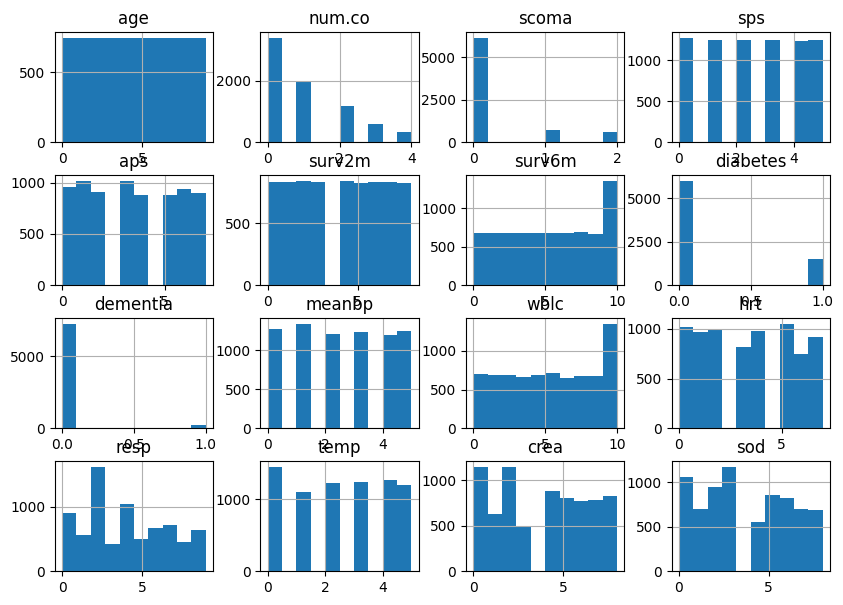

In [ ]:
df_final.hist(figsize=(10,7))

In [ ]:
df_final = pd.concat([new_df, new_tar],axis=1)
df_final.to_csv('dataframe.csv', index=True)
print(df_final.shape)
df_final.columns

(7492, 22)


Index(['age', 'sex', 'dzgroup', 'dzclass', 'num.co', 'scoma', 'race', 'sps',
       'aps', 'surv2m', 'surv6m', 'diabetes', 'dementia', 'ca', 'meanbp',
       'wblc', 'hrt', 'resp', 'temp', 'crea', 'sod', 'sfdm2'],
      dtype='object')

In [ ]:
df_final.head(20)

,age,sex,dzgroup,dzclass,num.co,scoma,race,sps,aps,surv2m,...,dementia,ca,meanbp,wblc,hrt,resp,temp,crea,sod,sfdm2
1,4,female,Cirrhosis,COPD/CHF/Cirrhosis,1,2,white,8,11,0,...,0,no,0,8,5,9,0,11,1,<2 mo. follow-up
2,2,female,Cirrhosis,COPD/CHF/Cirrhosis,1,0,white,2,8,5,...,0,no,3,3,3,7,7,9,2,<2 mo. follow-up
3,1,female,Lung Cancer,Cancer,1,0,white,2,1,4,...,0,metastatic,4,4,3,8,0,1,7,no(M2 and SIP pres)
4,9,female,ARF/MOSF w/Sepsis,ARF/MOSF,0,1,white,4,4,3,...,0,no,1,7,5,3,8,1,9,no(M2 and SIP pres)
5,10,male,Coma,Coma,0,3,white,2,3,1,...,0,no,7,5,4,10,9,0,7,<2 mo. follow-up
6,4,male,CHF,COPD/CHF/Cirrhosis,0,0,white,1,8,7,...,0,no,5,6,5,7,7,7,1,no(M2 and SIP pres)
10,1,male,CHF,COPD/CHF/Cirrhosis,0,0,white,0,0,7,...,0,no,3,5,4,5,4,3,2,no(M2 and SIP pres)
11,3,male,Lung Cancer,Cancer,0,0,white,1,1,4,...,0,metastatic,4,5,3,4,4,4,4,<2 mo. follow-up
12,0,female,Cirrhosis,COPD/CHF/Cirrhosis,0,0,white,5,4,6,...,0,no,1,1,0,3,6,0,0,no(M2 and SIP pres)
13,6,male,CHF,COPD/CHF/Cirrhosis,0,0,white,2,5,6,...,0,no,3,4,2,4,1,9,7,no(M2 and SIP pres)
